<a href="https://colab.research.google.com/github/sunnysavita10/Generative-AI-Indepth-Basic-to-Advance/blob/main/basic_retrieval_and_contextual_compression_retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/langchain-ai/langchain/tree/master/libs/langchain/langchain/retrievers/document_compressors

https://blog.langchain.dev/improving-document-retrieval-with-contextual-compression/

In [1]:
!pip install langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.6/974.6 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.8/321.8 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.1/127.1 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 11.2 MB/s eta 0:00:00


In [2]:
!pip install langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.4/327.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00


In [3]:
#facebook ai similarity search
!pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 41.8 MB/s eta 0:00:00


In [15]:
from langchain_community.document_loaders import TextLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import CharacterTextSplitter

In [5]:
#loading the data
documents = TextLoader("/content/state_of_the_union.txt").load()

In [6]:
#chunking
text_splitter = CharacterTextSplitter(chunk_size=500, chunk_overlap=100)

In [7]:
texts = text_splitter.split_documents(documents)

In [16]:
texts

[Document(page_content='Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress and the Cabinet. Justices of the Supreme Court. My fellow Americans.  \n\nLast year COVID-19 kept us apart. This year we are finally together again. \n\nTonight, we meet as Democrats Republicans and Independents. But most importantly as Americans. \n\nWith a duty to one another to the American people to the Constitution. \n\nAnd with an unwavering resolve that freedom will always triumph over tyranny.', metadata={'source': '/content/state_of_the_union.txt'}),
 Document(page_content='And with an unwavering resolve that freedom will always triumph over tyranny. \n\nSix days ago, Russia’s Vladimir Putin sought to shake the foundations of the free world thinking he could make it bend to his menacing ways. But he badly miscalculated. \n\nHe thought he could roll into Ukraine and the world would roll over. Instead he met a wall of strength he never imagined. \n\nHe met the Uk

In [17]:
from google.colab import userdata
OPENAI_API_KEY=userdata.get('OPENAI_API_KEY')

In [18]:
import os
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

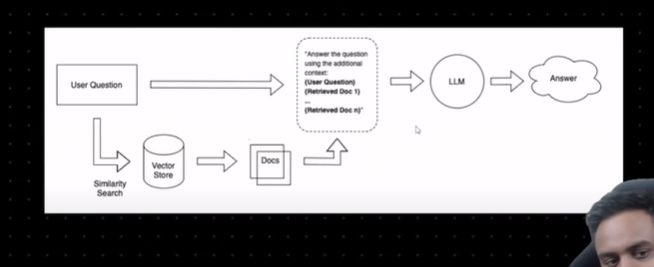

In [10]:
#storing the data in db
retriever = FAISS.from_documents(texts, OpenAIEmbeddings()).as_retriever()

In [11]:
#relevant result
docs = retriever.invoke("What did the president say about Ketanji Brown Jackson")

In [13]:
# Helper function for printing docs

def pretty_print_docs(docs):
    print(
        f"\n{'-' * 100}\n".join(
            [f"Document {i+1}:\n\n" + d.page_content for i, d in enumerate(docs)]
        )
    )

In [14]:
pretty_print_docs(docs)

Document 1:

One of the most serious constitutional responsibilities a President has is nominating someone to serve on the United States Supreme Court. 

And I did that 4 days ago, when I nominated Circuit Court of Appeals Judge Ketanji Brown Jackson. One of our nation’s top legal minds, who will continue Justice Breyer’s legacy of excellence.
----------------------------------------------------------------------------------------------------
Document 2:

As I said last year, especially to our younger transgender Americans, I will always have your back as your President, so you can be yourself and reach your God-given potential. 

While it often appears that we never agree, that isn’t true. I signed 80 bipartisan bills into law last year. From preventing government shutdowns to protecting Asian-Americans from still-too-common hate crimes to reforming military justice.
----------------------------------------------------------------------------------------------------
Document 3:

A for

In [19]:
docs2 = retriever.invoke("What were the top three priorities outlined in the most recent State of the Union address?")

In [20]:
pretty_print_docs(docs2)

Document 1:

Because I see the future that is within our grasp. 

Because I know there is simply nothing beyond our capacity. 

We are the only nation on Earth that has always turned every crisis we have faced into an opportunity. 

The only nation that can be defined by a single word: possibilities. 

So on this night, in our 245th year as a nation, I have come to report on the State of the Union. 

And my report is this: the State of the Union is strong—because you, the American people, are strong.
----------------------------------------------------------------------------------------------------
Document 2:

Vice President Harris and I ran for office with a new economic vision for America. 

Invest in America. Educate Americans. Grow the workforce. Build the economy from the bottom up  
and the middle out, not from the top down.  

Because we know that when the middle class grows, the poor have a ladder up and the wealthy do very well. 

America used to have the best roads, bridges

In [21]:
docs3 = retriever.invoke("How did the President propose to tackle the issue of climate change?")


In [22]:
pretty_print_docs(docs3)

Document 1:

And we’ll do it all to withstand the devastating effects of the climate crisis and promote environmental justice. 

We’ll build a national network of 500,000 electric vehicle charging stations, begin to replace poisonous lead pipes—so every child—and every American—has clean water to drink at home and at school, provide affordable high-speed internet for every American—urban, suburban, rural, and tribal communities. 

4,000 projects have already been announced.
----------------------------------------------------------------------------------------------------
Document 2:

Second – cut energy costs for families an average of $500 a year by combatting climate change.  

Let’s provide investments and tax credits to weatherize your homes and businesses to be energy efficient and you get a tax credit; double America’s clean energy production in solar, wind, and so much more;  lower the price of electric vehicles, saving you another $80 a month because you’ll never have to pay 

In [24]:
from langchain_openai import OpenAI

In [25]:
llm=OpenAI(temperature=0)

In [29]:
from langchain.chains import RetrievalQA

In [30]:
chain = RetrievalQA.from_chain_type(llm=llm, retriever=retriever)

In [31]:
query="What were the top three priorities outlined in the most recent State of the Union address?"

In [32]:
#final answer 
chain.invoke(query)

{'query': 'What were the top three priorities outlined in the most recent State of the Union address?',
 'result': " The top three priorities outlined in the most recent State of the Union address were investing in America's infrastructure, addressing the opioid epidemic, and creating more jobs and economic opportunities for Americans."}

In [33]:
print(chain.invoke(query)['result'])

 The top three priorities outlined in the most recent State of the Union address were investing in America's infrastructure, addressing the opioid epidemic, and creating more jobs and economic opportunities for Americans.


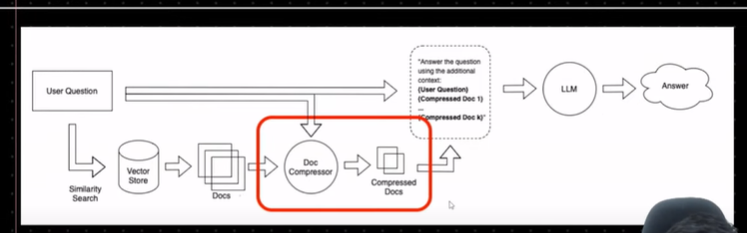

In [34]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor
from langchain_openai import OpenAI

In [35]:
compressor = LLMChainExtractor.from_llm(llm)

In [36]:
#compressor
compression_retriever=ContextualCompressionRetriever(base_compressor=compressor, base_retriever=retriever)

In [37]:
compressed_docs = compression_retriever.invoke("What did the president say about Ketanji Jackson Brown")

In [38]:
compressed_docs

[Document(page_content='I nominated Circuit Court of Appeals Judge Ketanji Brown Jackson.', metadata={'source': '/content/state_of_the_union.txt'})]

In [39]:
compressed_docs = compression_retriever.invoke("What were the top three priorities outlined in the most recent State of the Union address?")

In [40]:
compressed_docs

[Document(page_content='- So on this night, in our 245th year as a nation, I have come to report on the State of the Union. \n- And my report is this: the State of the Union is strong—because you, the American people, are strong.', metadata={'source': '/content/state_of_the_union.txt'}),
 Document(page_content='Invest in America. Educate Americans. Grow the workforce.', metadata={'source': '/content/state_of_the_union.txt'}),
 Document(page_content='First, beat the opioid epidemic. \n\nThere is so much we can do. Increase funding for prevention, treatment, harm reduction, and recovery.', metadata={'source': '/content/state_of_the_union.txt'}),
 Document(page_content='More infrastructure and innovation in America. \n\nMore goods moving faster and cheaper in America. \n\nMore jobs where you can earn a good living in America.', metadata={'source': '/content/state_of_the_union.txt'})]

In [41]:
pretty_print_docs(compressed_docs)

Document 1:

- So on this night, in our 245th year as a nation, I have come to report on the State of the Union. 
- And my report is this: the State of the Union is strong—because you, the American people, are strong.
----------------------------------------------------------------------------------------------------
Document 2:

Invest in America. Educate Americans. Grow the workforce.
----------------------------------------------------------------------------------------------------
Document 3:

First, beat the opioid epidemic. 

There is so much we can do. Increase funding for prevention, treatment, harm reduction, and recovery.
----------------------------------------------------------------------------------------------------
Document 4:

More infrastructure and innovation in America. 

More goods moving faster and cheaper in America. 

More jobs where you can earn a good living in America.


In [42]:
compressed_docs2 = compression_retriever.invoke("How did the President propose to tackle the issue of climate change?")

In [43]:
pretty_print_docs(compressed_docs2)

Document 1:

We’ll do it all to withstand the devastating effects of the climate crisis and promote environmental justice. We’ll build a national network of 500,000 electric vehicle charging stations, begin to replace poisonous lead pipes—so every child—and every American—has clean water to drink at home and at school.
----------------------------------------------------------------------------------------------------
Document 2:

combatting climate change


second way 

In [44]:
from langchain.retrievers.document_compressors import LLMChainFilter

In [45]:
filter = LLMChainFilter.from_llm(llm)

In [46]:
compression_retriever2 = ContextualCompressionRetriever(base_compressor=filter, base_retriever=retriever)

In [47]:
compressed_docs3 = compression_retriever2.invoke("What were the top three priorities outlined in the most recent State of the Union address?")

In [48]:
pretty_print_docs(compressed_docs3)

Document 1:

Vice President Harris and I ran for office with a new economic vision for America. 

Invest in America. Educate Americans. Grow the workforce. Build the economy from the bottom up  
and the middle out, not from the top down.  

Because we know that when the middle class grows, the poor have a ladder up and the wealthy do very well. 

America used to have the best roads, bridges, and airports on Earth. 

Now our infrastructure is ranked 13th in the world.
----------------------------------------------------------------------------------------------------
Document 2:

More infrastructure and innovation in America. 

More goods moving faster and cheaper in America. 

More jobs where you can earn a good living in America. 

And instead of relying on foreign supply chains, let’s make it in America. 

Economists call it “increasing the productive capacity of our economy.” 

I call it building a better America. 

My plan to fight inflation will lower your costs and lower the defi

In [49]:
#length of complete orignal context
original_contexts_len = len("\n\n".join([d.page_content for i, d in enumerate(docs2)]))

In [50]:
original_contexts_len

1789

In [53]:
#length of complete compressed context
compressed_contexts_len = len("\n\n".join([d.page_content for i, d in enumerate(compressed_docs)]))

In [54]:
compressed_contexts_len

557

In [55]:
print("Original context length:", original_contexts_len)

Original context length: 1789


In [56]:
print("Compressed context length:", compressed_contexts_len)

Compressed context length: 557


In [57]:
print("Compressed Ratio:", f"{original_contexts_len/(compressed_contexts_len + 1e-5):.2f}x")

Compressed Ratio: 3.21x


third way

In [58]:
from langchain.retrievers.document_compressors import EmbeddingsFilter

In [59]:
from langchain_openai import OpenAIEmbeddings

In [60]:
embeddings = OpenAIEmbeddings()

In [85]:
embeddings_filter = EmbeddingsFilter(embeddings=embeddings)

In [86]:
compression_retriever3 = ContextualCompressionRetriever(base_compressor=embeddings_filter, base_retriever=retriever)

In [87]:
compressed_docs4 = compression_retriever3.invoke("What were the top three priorities outlined in the most recent State of the Union address?")

In [88]:
pretty_print_docs(compressed_docs4)

Document 1:

Because I see the future that is within our grasp. 

Because I know there is simply nothing beyond our capacity. 

We are the only nation on Earth that has always turned every crisis we have faced into an opportunity. 

The only nation that can be defined by a single word: possibilities. 

So on this night, in our 245th year as a nation, I have come to report on the State of the Union. 

And my report is this: the State of the Union is strong—because you, the American people, are strong.
----------------------------------------------------------------------------------------------------
Document 2:

Vice President Harris and I ran for office with a new economic vision for America. 

Invest in America. Educate Americans. Grow the workforce. Build the economy from the bottom up  
and the middle out, not from the top down.  

Because we know that when the middle class grows, the poor have a ladder up and the wealthy do very well. 

America used to have the best roads, bridges

In [89]:
print("Original context length:", original_contexts_len)

Original context length: 1789


In [102]:
compressed_contexts_len = len("\n\n".join([d.page_content for i, d in enumerate(compressed_docs)]))

In [103]:
print("Compressed context length:", compressed_contexts_len)

Compressed context length: 1779


In [104]:
print("Compressed Ratio:", f"{original_contexts_len/(compressed_contexts_len + 1e-5):.2f}x")

Compressed Ratio: 1.01x


In [93]:
#to add multiple components
from langchain.retrievers.document_compressors import DocumentCompressorPipeline
#to remove redudancy b/w embedding
from langchain_community.document_transformers import EmbeddingsRedundantFilter
from langchain_text_splitters import CharacterTextSplitter


In [94]:
splitter = CharacterTextSplitter(chunk_size=300, chunk_overlap=0, separator=". ")

In [95]:
redundant_filter = EmbeddingsRedundantFilter(embeddings=embeddings)

In [97]:
relevant_filter = EmbeddingsFilter(embeddings=embeddings, similarity_threshold=0.76)

In [98]:
#pipeline for the components
pipeline_compressor = DocumentCompressorPipeline(transformers=[splitter, redundant_filter, relevant_filter])

In [99]:
compression_retriever = ContextualCompressionRetriever(base_compressor=pipeline_compressor, base_retriever=retriever)

In [100]:
compressed_docs = compression_retriever.invoke("What were the top three priorities outlined in the most recent State of the Union address?")

In [101]:
pretty_print_docs(compressed_docs)

Document 1:

So on this night, in our 245th year as a nation, I have come to report on the State of the Union. 

And my report is this: the State of the Union is strong—because you, the American people, are strong.
----------------------------------------------------------------------------------------------------
Document 2:

Vice President Harris and I ran for office with a new economic vision for America. 

Invest in America. Educate Americans. Grow the workforce. Build the economy from the bottom up  
and the middle out, not from the top down
----------------------------------------------------------------------------------------------------
Document 3:

And soon, we’ll strengthen the Violence Against Women Act that I first wrote three decades ago. It is important for us to show the nation that we can come together and do big things. 

So tonight I’m offering a Unity Agenda for the Nation. Four big things we can do together
----------------------------------------------------------

In [105]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(temperature=0)

In [106]:
from langchain.chains import RetrievalQA

In [107]:
chain = RetrievalQA.from_chain_type(llm=llm, retriever=compression_retriever)

In [108]:
query="What were the top three priorities outlined in the most recent State of the Union address?"

In [109]:
chain.invoke(query)

{'query': 'What were the top three priorities outlined in the most recent State of the Union address?',
 'result': 'The top three priorities outlined in the most recent State of the Union address were:\n\n1. Strengthening the Violence Against Women Act\n2. Implementing a Unity Agenda for the Nation, focusing on infrastructure, innovation, job creation, and domestic manufacturing\n3. Addressing the opioid epidemic through increased funding for prevention, treatment, harm reduction, and recovery'}

In [110]:
print(chain.invoke(query)['result'])

The top three priorities outlined in the most recent State of the Union address were:

1. Strengthening the Violence Against Women Act
2. Implementing a Unity Agenda for the Nation, focusing on infrastructure, innovation, job creation, and domestic manufacturing
3. Addressing the opioid epidemic through increased funding for prevention, treatment, harm reduction, and recovery


The top three priorities outlined in the most recent State of the Union address were:

1. Beating the opioid epidemic by increasing funding for prevention, treatment, harm reduction, and recovery.
2. Strengthening infrastructure and innovation in America to improve transportation and create more jobs.
3. Promoting domestic production and reducing reliance on foreign supply chains to boost the economy and create more opportunities for Americans.